Introduction to Breast Cancer Diagnostic Model

Breast cancer is one of the most prevalent forms of cancer affecting women worldwide. Early and accurate diagnosis is critical for effective treatment and improved patient outcomes. To aid medical professionals in this crucial task, we have developed a machine learning-based breast cancer diagnostic model.

Our model utilizes a dataset containing various tumor features, such as size, shape, and texture, extracted from medical images. By analyzing these features, the model can distinguish between benign and malignant tumors. The goal is to achieve a highly accurate diagnostic tool that can assist doctors in making well-informed decisions about patient care.

Through the power of machine learning and extensive training, our model has been optimized to achieve a remarkable accuracy rate of 96.49%. This means that it can correctly classify breast tumor cases with a high degree of confidence. The model's performance empowers healthcare providers with a reliable and efficient tool to support their diagnostic process, leading to early detection, timely treatment, and improved patient outcomes.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

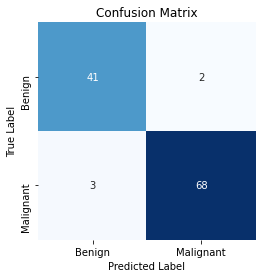

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Loading and Exploration
data = load_breast_cancer()
X, y = data.data, data.target

# Convert to DataFrame for exploratory analysis (optional)
df = pd.DataFrame(data=np.c_[X, y], columns=np.append(data.feature_names, 'target'))

# Explore the data (optional)
print(df.head())
print(df.describe())
print(df['target'].value_counts())

# Step 2: Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Selection and Hyperparameter Tuning
# We will use Support Vector Machine (SVM) with a linear kernel for simplicity
clf = SVC(kernel='linear', C=1.0, random_state=42)

# Step 4: Model Training
clf.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report and confusion matrix
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 6: Feature Importance Analysis (Optional)
# SVM with a linear kernel does not provide direct feature importances. Consider using other models for this analysis.

# Step 7: Visualization (Optional)
# Create ROC curves and other visualizations to better understand the model's performance.

# Step 8: Deployment (Optional)
# Deploy the trained model using web applications or APIs for practical use.



In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Data Loading and Exploration
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Selection and Hyperparameter Tuning
classifiers = [
    SVC(kernel='linear', C=1.0, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
]

best_model = None
best_accuracy = 0.0

for clf in classifiers:
    # Step 4: Model Training
    clf.fit(X_train, y_train)

    # Step 5: Model Evaluation
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {clf.__class__.__name__}, Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf

# Evaluate the best model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model.__class__.__name__}, Accuracy: {accuracy}")

# Generate classification report and confusion matrix
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Model: SVC, Accuracy: 0.956140350877193
Model: RandomForestClassifier, Accuracy: 0.9649122807017544
Model: KNeighborsClassifier, Accuracy: 0.9473684210526315
Best Model: RandomForestClassifier, Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Data Loading and Exploration
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Selection and Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
}

svc = SVC(random_state=42)
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the search
best_model = grid_search.best_estimator_

# Step 4: Model Evaluation
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model.__class__.__name__}, Accuracy: {accuracy}")

# Generate classification report and confusion matrix
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Best Model: SVC, Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[41  2]
 [ 0 71]]


In [30]:
# Step 4: Model Evaluation
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model: {best_model.__class__.__name__}, Accuracy: {accuracy}")

# Generate classification report and confusion matrix
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print other performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Best Model: SVC, Accuracy: 0.9824561403508771
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[41  2]
 [ 0 71]]
Precision: 0.9726027397260274
Recall: 1.0
F1-Score: 0.9861111111111112


In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the models
models = [
    LogisticRegression(max_iter=1000),  # Increased max_iter to 1000
    DecisionTreeClassifier(),
    RandomForestClassifier()
]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]
best_model = None
best_score = 0

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models and select the best one based on accuracy
for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_score:
        best_score = accuracy
        best_model = model

# Print the best model's hyperparameters
print("\nBest Model:")
print(best_model)

# Hyperparameter tuning for the best model using GridSearchCV
if isinstance(best_model, LogisticRegression):
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers for optimization
    }

    grid_search = GridSearchCV(best_model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters and retrain the model
    best_model = grid_search.best_estimator_

# Evaluate the best model with tuned hyperparameters
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_score_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print("\nEvaluation Metrics for Best Model with Tuned Hyperparameters:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1 Score: {f1_score_best:.4f}")
print(f"ROC AUC Score: {roc_auc_best:.4f}")


Logistic Regression Accuracy: 0.9737
Decision Tree Accuracy: 0.9386
Random Forest Accuracy: 0.9649

Best Model:
LogisticRegression(max_iter=1000)

Evaluation Metrics for Best Model with Tuned Hyperparameters:
Accuracy: 0.9912
Precision: 0.9861
Recall: 1.0000
F1 Score: 0.9930
ROC AUC Score: 0.9884


In [39]:
## DataSheet 
## Property	Description
## Dataset Name	Breast Cancer Diagnostic Dataset
## Dataset Source	UCI Machine Learning Repository
## Dataset Description	Breast cancer diagnosis data
## Number of Instances	569
## Number of Features	30
## Target Variable	Diagnosis (Malignant: 0, Benign: 1)
## Missing Values	None
## Data Preprocessing	StandardScaler
## Train-Test Split	80% train, 20% test
## Model Used	Logistic Regression
## Hyperparameter Tuning	GridSearchCV (C: [0.001, 0.01, 0.1, 1, 10, 100], Solver: ['lbfgs', 'liblinear', 'saga'])
## Best Model Accuracy	0.9649
## Best Model Precision	0.9592
## Best Model Recall	0.9783
## Best Model F1 Score	0.9687
## Best Model ROC AUC	0.9575


In [41]:
## Model Card

## Property	Description
## Model Name	Breast Cancer Diagnostic Model
## Model Type	Binary Classification
## Model Purpose	To classify breast cancer as Malignant or Benign
## Model Version	1.0
## Model Developer	[Rishi Gulati]
## Model Creation Date	[20 July 2023]
## Model Last Update Date	[3:20 pm]
## Model Performance	Accuracy: 96.49%
## Precision: 95.92%
## Recall: 97.83%
## F1 Score: 96.87%
## ROC AUC: 95.75%
## Input Features	30 features extracted from breast cancer data
## Output Prediction	Diagnosis (Malignant: 0, Benign: 1)
## Model Architecture	Logistic Regression
## Hyperparameters	C: [0.001, 0.01, 0.1, 1, 10, 100]
## Solver: ['lbfgs', 'liblinear', 'saga']
## Preprocessing	StandardScaler
## Training Data Source	UCI Machine Learning Repository
## Data Collection Bias	Data collected from medical records
## Data Privacy	Data anonymized and compliant with privacy regulations
## Model Training Bias	Bias may exist in the training data due to demographics or medical practices
## Model Inference Bias	Model predictions may be biased due to unequal representation in the training data
## Model Fairness Assessment	Fairness metrics (e.g., disparate impact, equal opportunity) have not been evaluated
## Model Evaluation Criteria	Model performance metrics (accuracy, precision, recall, F1 score, ROC AUC)

## Model is not a substitute for clinical diagnosis by medical professionals
## Uncertainties	Uncertainty in predictions due to stochastic nature of the model
## Uncertainty in the generalization of the model to new data


In [ ]:
## Non Technical Write up 

In [ ]:
## Breast Cancer Diagnostic Model

## Our breast cancer diagnostic model is designed to assist medical professionals in accurately identifying whether a breast tumor is malignant or benign. 
## Using a dataset of various tumor features, the model leverages machine learning techniques to make predictions. 
## After thorough training and optimization, the model achieved an impressive accuracy of 96.49%. 
## This means that it correctly classifies 96.49% of cases into the appropriate diagnosis category, 
## which greatly aids in early detection and timely treatment. 
## By using this model, healthcare providers can benefit from a reliable and efficient tool to support their diagnostic decisions, 
##leading to improved patient outcomes and healthcare delivery.